In [1]:
# for numeric/scientific calculations
import numpy as np

# for data manipulation
import pandas as pd

# for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

# for scaling/normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# for encoding
from sklearn.preprocessing import LabelEncoder

# for machine learning
from sklearn.model_selection import train_test_split
from sklearn import metrics #confusion_matrix,classification_report,mean_squared_error,mean_absolute_error

# for regression
from sklearn.linear_model import LinearRegression

#for Classification 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

#for Clustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

#for cross-validation
from sklearn.model_selection import KFold

#for ensemble 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

# to ignore/not display warnings
import warnings
warnings.filterwarnings(action='ignore')

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score
#accuracy_score(x_test['class'],y_preds)
# For Ada boost model
#from xgboost import XGBClassifier

In [2]:
retail = pd.read_excel('Online_Retail_Subset.xlsx')

In [3]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
np.count_nonzero(retail['Description'].unique())


2221

In [5]:
retail.shape

(14999, 8)

In [6]:
retail.isna().sum()

InvoiceNo         0
StockCode         0
Description      60
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID     4271
Country           0
dtype: int64

In [7]:
retail.dropna(axis = 0,how = 'any',inplace = True)
retail.shape

(10728, 8)

In [8]:
retail['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland'], dtype=object)

In [9]:
retail.describe()

,Quantity,UnitPrice,CustomerID
count,10728.000000,10728.000000,10728.000000
mean,9.372110,3.123054,15590.606264
std,101.360524,5.330112,1764.101280
min,-9360.000000,0.000000,12347.000000
25%,1.000000,1.250000,14213.000000
50%,4.000000,2.100000,15658.000000
75%,12.000000,3.750000,17218.000000
max,2880.000000,295.000000,18239.000000


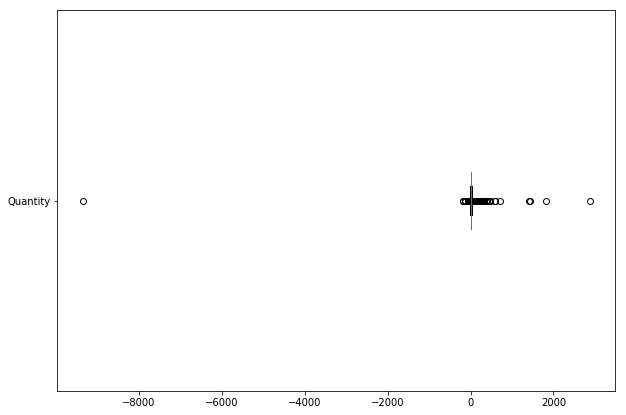

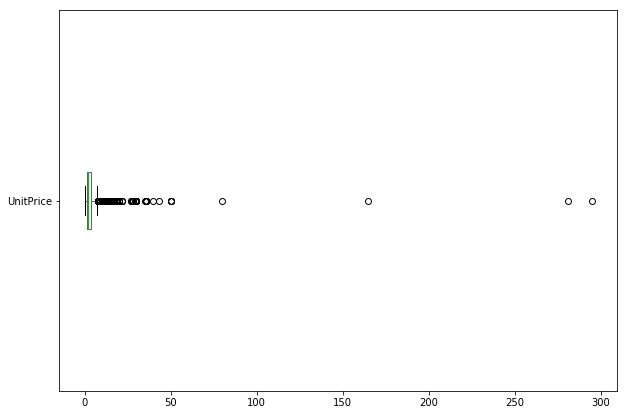

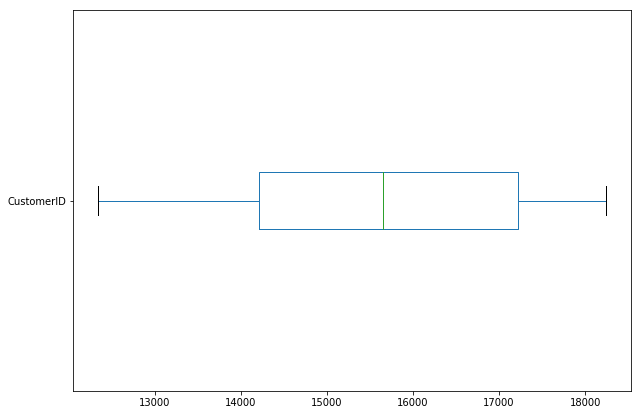

In [10]:
for col in retail:
    if retail[col].dtype in ['int64','float64']:
        plt.figure()
        retail[col].plot(kind = 'box',vert = False, figsize = (10,7))

In [11]:
retail = retail.loc[retail['Quantity'].values >= 0]

In [12]:
retail.shape

(10577, 8)

In [13]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10577 entries, 0 to 14998
Data columns (total 8 columns):
InvoiceNo      10577 non-null object
StockCode      10577 non-null object
Description    10577 non-null object
Quantity       10577 non-null int64
InvoiceDate    10577 non-null datetime64[ns]
UnitPrice      10577 non-null float64
CustomerID     10577 non-null float64
Country        10577 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 743.7+ KB


United Kingdom    9842
Germany            197
France             167
EIRE               132
Norway              73
Lithuania           34
Iceland             31
Italy               24
Japan               16
Australia           14
Portugal            14
Belgium             12
Poland               8
Switzerland          6
Spain                5
Netherlands          2
Name: Country, dtype: int64


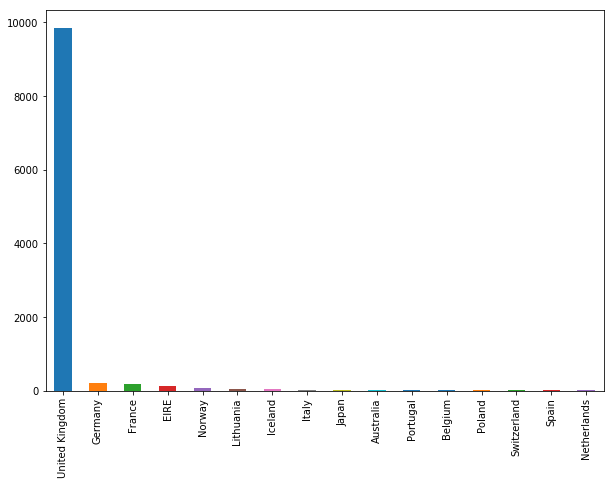

In [14]:
plt.figure(figsize = (10,7))
countries = retail['Country'].value_counts()
countries.plot.bar()
print(countries)

In [81]:
retail['purchase'] = retail['Quantity'] * retail['UnitPrice']
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,purchase,cluster
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2


In [98]:
retail_df = retail[['purchase','CustomerID','Country']]
retail_df.head()

,purchase,CustomerID,Country
0,15.30,17850.0,United Kingdom
1,20.34,17850.0,United Kingdom
2,22.00,17850.0,United Kingdom
3,20.34,17850.0,United Kingdom
4,20.34,17850.0,United Kingdom


In [99]:
le = LabelEncoder()
retail_df['Country'] = le.fit_transform(retail_df['Country'])

In [100]:
x_train,x_test = train_test_split(retail_df,test_size = .2,random_state = 100)

In [135]:
model = KMeans(n_clusters=5)
model.fit(x_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [136]:
model.cluster_centers_

array([[2.36314020e+01, 1.29995321e+04, 1.24206081e+01, 2.00000000e+00],
       [1.69486133e+01, 1.69570200e+04, 1.50000000e+01, 9.43531094e-01],
       [2.13832723e+01, 1.46175309e+04, 1.42116705e+01, 4.09610984e-01],
       [1.62796177e+01, 1.78778127e+04, 1.50000000e+01, 1.00000000e+00],
       [1.99992095e+01, 1.57802072e+04, 1.48949798e+01, 2.40918396e-14]])

In [137]:
print (type(model.labels_))
unique, counts = np.unique(model.labels_, return_counts=True)
print(dict(zip(unique, counts)))

<class 'numpy.ndarray'>
{0: 1776, 1: 1397, 2: 1748, 3: 1807, 4: 1733}


<Figure size 1800x1440 with 0 Axes>

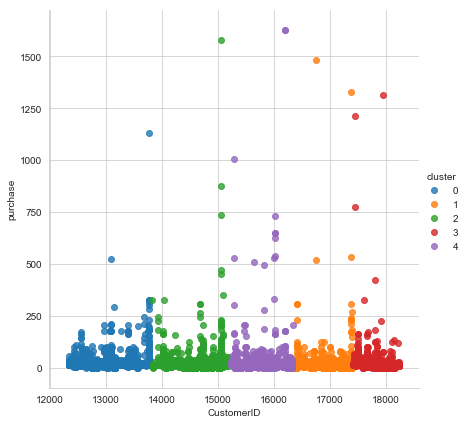

In [138]:
x_train['cluster'] = model.labels_
plt.figure(figsize = (25,20))
sns.set_style('whitegrid')
sns.lmplot('CustomerID','purchase',data=x_train, hue='cluster',size=6,aspect=1,fit_reg=False)    